# <font color=4169E1> Watchis
---
**versão: 0.1.5**
## Intro:

  
Watchis é um sistema com uso de machine-learning para recomendação de filmes. Vamos utilizar os seguintes datasets:
<br>
The Movies Datasets: <a href="https://www.kaggle.com/rounakbanik/the-movies-dataset">Link para o dataset</a>
<br>
TMDB_5000: <a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">Link para o dataset</a>


## Sumário

###1.Análise exploratória dos dados
###2.Introdução ao Machine Learning

**Documentação:** <a href="https://docs.google.com/document/d/1FQ8ZlsU1m7-uFC_SU_d6jtJEfITCK8wDmtYTDA20Z9o/edit">Artigo Watchis</a>

##<font color=4169E1>Importação das Bibliotecas e Datasets

In [ ]:
#atualizando o seaborn, para podermos utilizar algumas novas funções
!pip install seaborn==0.11.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from datetime import datetime

notas = pd.read_csv('https://raw.githubusercontent.com/Guilherme-Farias/Watchis-backend/master/ratings_small.csv')
filmes = pd.read_csv('https://raw.githubusercontent.com/Guilherme-Farias/Watchis-backend/master/tmdb_5000_movies.csv')
creditos = pd.read_csv('https://raw.githubusercontent.com/Guilherme-Farias/Watchis-backend/master/tmdb_5000_credits.csv')
sns.set_theme(style="whitegrid")

     |████████████████████████████████| 286kB 2.8MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


##<font color=4169E1> Ajustando as colunas dos Datasets

In [ ]:
#Traduzindo colunas e fazendo merge entre os datasets
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
filmes.columns = ['orcamento', 'generos', 'homepage', 'filmeId', 'palavras_chave', 'idioma_original', 'titulo_original', 'visao_geral', 'popularidade', 'companhias_producao', 'paises_producao', 'data_lancamento', 'receita', 'tempo_de_filme', 'lingua_falada', 'status', 'slogan', 'titulo', 'media_notas', 'total_notas']
creditos.columns = ['filmeId', 'titulo', 'elenco', 'equipe']
filmes = filmes.merge(creditos[['filmeId','elenco','equipe']], on='filmeId')

#<font color=4169E1>1.Análise exploratória dos dados

##<font color=4169E1>1.1.Análise exploratória do dataset de Notas do The Movies Dataset

###<font color=4169E1>1.1.1.Conhecendo os dados

In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100004 non-null  int64  
 1   filmeId    100004 non-null  int64  
 2   nota       100004 non-null  float64
 3   momento    100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


###<font color=4169E1>1.1.2.Trabalhando sobre as notas

In [ ]:
notas['nota'].value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: nota, dtype: int64

####<font color=4169E1>1.1.2.1.Histograma das avaliações por nota

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text major ticklabel objects>)

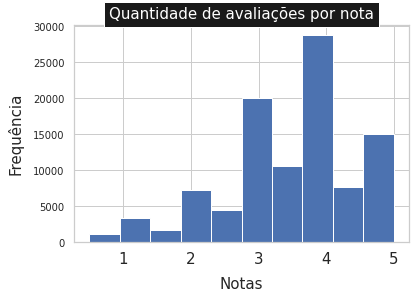

In [ ]:
plt.hist(notas['nota'])
plt.title("Quantidade de avaliações por nota",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Notas", fontsize = 15, labelpad = 10)
plt.xticks(fontsize = 15)
plt.ylabel("Frequência", fontsize = 15, labelpad = 10)
plt.yticks(fontsize = 10)

####<font color=4169E1>1.1.2.2.Gráfico de caixa das avaliações por nota

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

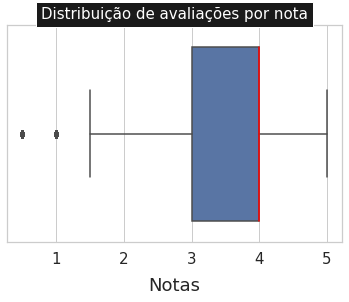

In [ ]:
sns.boxplot(notas['nota'], medianprops={'color':'red'})
plt.title("Distribuição de avaliações por nota",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Notas", fontsize = 18, labelpad = 10)
plt.xticks(fontsize = 15)

####<font color=4169E1>1.1.2.3.Gráfico de densidade cumulativa das avaliações por nota

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

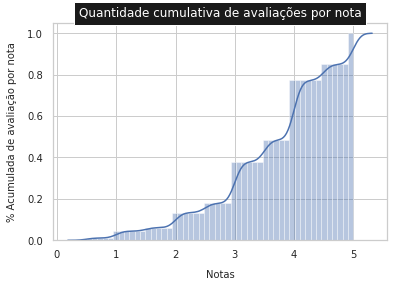

In [ ]:

sns.distplot(notas['nota'], kde_kws={"cumulative":True}, hist_kws={"cumulative":True})



plt.title("Quantidade cumulativa de avaliações por nota",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 12)
plt.xlabel("Notas", fontsize = 10, labelpad = 10)
plt.xticks(fontsize = 10)
plt.ylabel("% Acumulada de avaliação por nota", fontsize = 10, labelpad = 10)
plt.yticks(fontsize = 10)

###<font color=4169E1>1.1.3.Trabalhando sobre a médias de notas por filmes

In [ ]:
nota_media_por_filme = notas.groupby('filmeId').mean()['nota']
nota_media_por_filme.describe()

count    9066.000000
mean        3.292054
std         0.881968
min         0.500000
25%         2.843750
50%         3.500000
75%         3.966250
max         5.000000
Name: nota, dtype: float64

####<font color=4169E1>1.1.3.1.Histograma das notas médias por filme

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

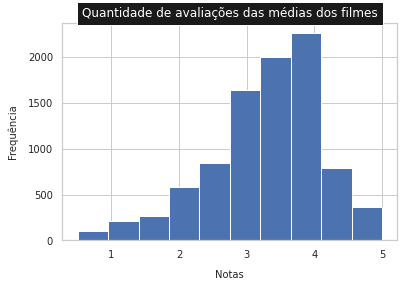

In [ ]:
plt.hist(nota_media_por_filme)
plt.title("Quantidade de avaliações das médias dos filmes",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 12)
plt.xlabel("Notas", fontsize = 10, labelpad = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Frequência", fontsize = 10, labelpad = 10)
plt.yticks(fontsize = 10)

####<font color=4169E1>1.1.3.2.Gráfico de caixa das notas médias por filme

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

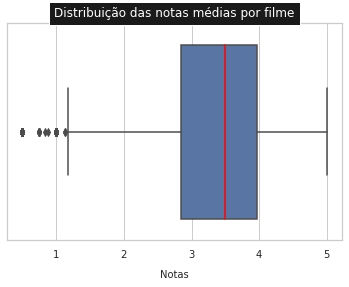

In [ ]:
sns.boxplot(nota_media_por_filme, medianprops={'color':'red'})



plt.title("Distribuição das notas médias por filme",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 12)
plt.xlabel("Notas", fontsize = 10, labelpad = 10)
plt.xticks(fontsize = 10)

####<font color=4169E1>1.1.3.3.Gráfico de densidade das notas médias por filme

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

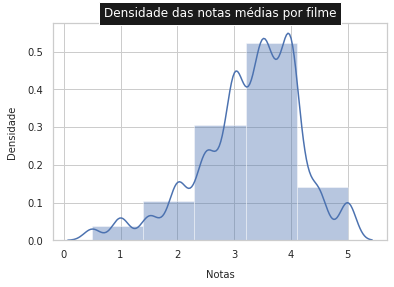

In [ ]:
sns.distplot(nota_media_por_filme, bins=5)



plt.title("Densidade das notas médias por filme",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 12)
plt.xlabel("Notas", fontsize = 10, labelpad = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Densidade", fontsize = 10, labelpad = 10)
plt.yticks(fontsize = 10)

####<font color=4169E1>1.1.3.4.Gráfico de densidade cumulativa das notas médias por filme

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

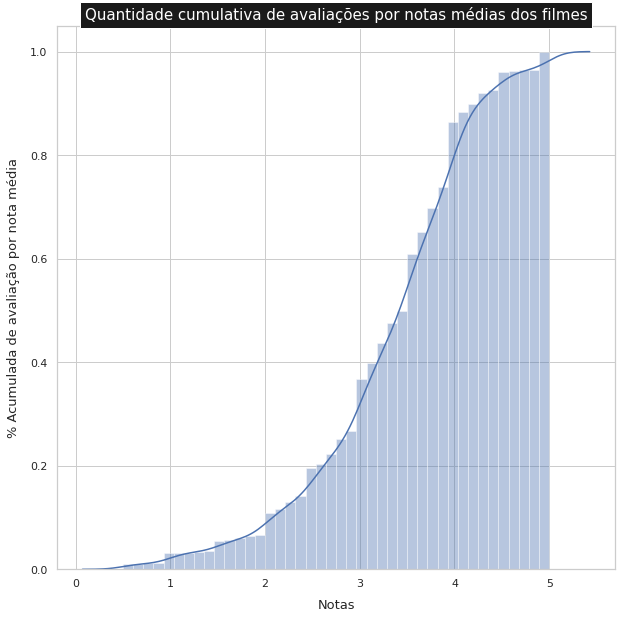

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(nota_media_por_filme, kde_kws={"cumulative":True}, hist_kws={"cumulative":True})
plt.title("Quantidade cumulativa de avaliações por notas médias dos filmes",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Notas", fontsize = 13, labelpad = 10)
plt.xticks(fontsize = 11)
plt.ylabel("% Acumulada de avaliação por nota média", fontsize = 13, labelpad = 10)
plt.yticks(fontsize = 11)

####<font color=4169E1>1.1.3.5.Variação da média por tamanho da amostra

(array([2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7]),
 <a list of 9 Text major ticklabel objects>)

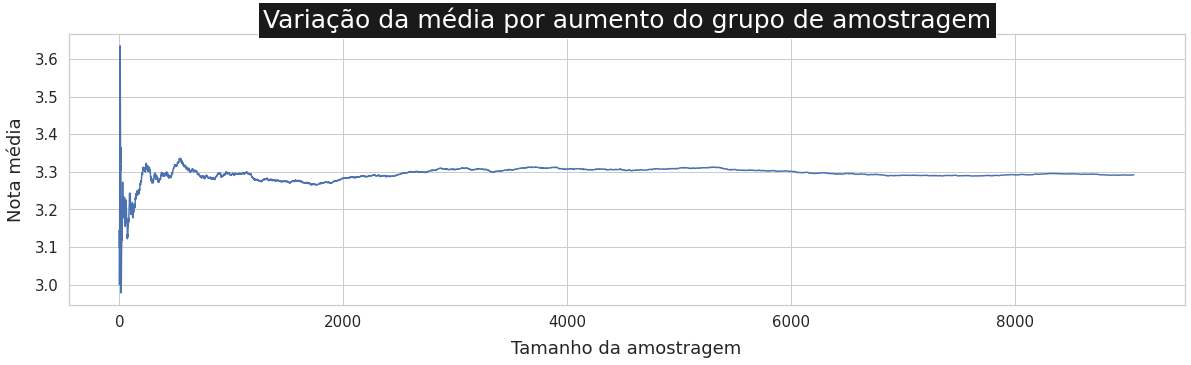

In [ ]:
np.random.seed(752243)
plt.figure(figsize=(20,5))
temp = nota_media_por_filme.sample(frac=1)
medias = [temp[0:i].mean() for i in range(1, len(temp))]
plt.plot(medias)

plt.title("Variação da média por aumento do grupo de amostragem",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.xlabel("Tamanho da amostragem", fontsize = 18, labelpad = 10)
plt.xticks(fontsize = 15)
plt.ylabel("Nota média", fontsize = 18, labelpad = 10)
plt.yticks(fontsize = 15)

###<font color=4169E1>1.1.4.Trabalhando sobre a quantidade de avaliação por tempo

In [ ]:
anos = pd.Series([pd.Timestamp(i, unit='s').year for i in notas.momento])
notas['ano'] = anos

In [ ]:
meses = pd.Series([pd.Timestamp(i, unit='s').month for i in notas.momento])
notas['mes'] = meses


####<font color=4169E1>1.1.4.1.Gráfico de barra por quantidade de notas por ano

In [ ]:
avaliacao_por_ano = (notas.ano.value_counts().sort_index()).to_frame().reset_index()
avaliacao_por_ano.columns = ['ano', 'quantidade_de_votos']
avaliacao_por_ano.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
ano,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
quantidade_de_votos,3,6239,3294,1825,5901,13869,4658,3938,4462,4658,7161,7493,1548,3676,3434,2518,4450,3849,1969,2224,6610,6225


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text major ticklabel objects>)

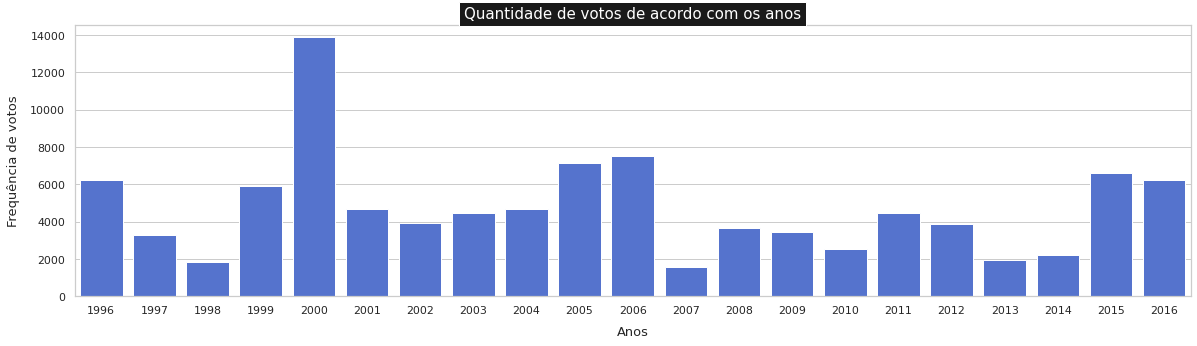

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="ano", y="quantidade_de_votos", data=avaliacao_por_ano[1:], color="#4169E1")
plt.xlabel("Anos")
plt.ylabel('Frequência de votos')


plt.title("Quantidade de votos de acordo com os anos",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Anos", fontsize = 13, labelpad = 10)
plt.xticks(fontsize = 11)
plt.ylabel("Frequência de votos", fontsize = 13, labelpad = 10)
plt.yticks(fontsize = 11)

####<font color=4169E1>1.1.4.2.Gráfico de barra por quantidade de notas por mês

In [ ]:
traducao = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}
avaliacao_por_mes = notas.mes.value_counts().sort_index().to_frame().reset_index()
avaliacao_por_mes.columns = ['mes', 'quantidade_de_votos']
avaliacao_por_mes['mes'] = avaliacao_por_mes['mes'].map(traducao)
avaliacao_por_mes.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
mes,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
quantidade_de_votos,7706,7150,7009,9612,8205,8854,7850,8463,6042,8124,11379,9610


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

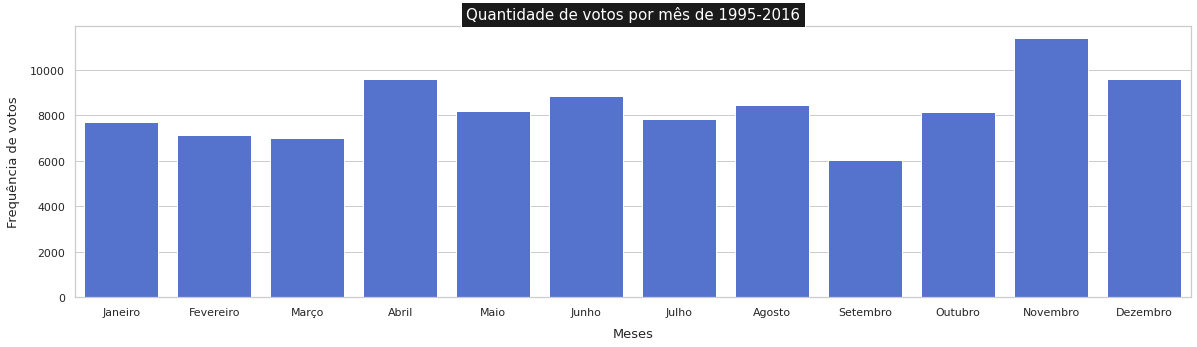

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="mes", y="quantidade_de_votos", data=avaliacao_por_mes, color="#4169E1")

plt.title("Quantidade de votos por mês de 1995-2016",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Meses", fontsize = 13, labelpad = 10)
plt.xticks(fontsize = 11)
plt.ylabel("Frequência de votos", fontsize = 13, labelpad = 10)
plt.yticks(fontsize = 11)

##<font color=4169E1>1.2.Análise exploratória do dataset do TMDB_5000

###<font color=4169E1>1.2.1.Organizando os dados

In [ ]:
colunas = ['generos', 'elenco', 'equipe', 'lingua_falada', 'paises_producao', 'companhias_producao', 'palavras_chave']

for coluna in colunas:
  filmes[coluna] = filmes[coluna].apply(literal_eval)

In [ ]:
def get_diretor(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

filmes['diretor'] = filmes['equipe'].apply(get_diretor)
filmes['diretor'].fillna('',inplace = True)
filmes.drop(['equipe'],axis = 1,inplace = True)

In [ ]:
colunas = ['generos', 'elenco', 'lingua_falada', 'paises_producao', 'companhias_producao', 'palavras_chave']
for coluna in colunas:
  filmes[coluna] = filmes[coluna].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

###<font color=4169E1>1.2.2.Trabalhando sobre os dados relacionados a Região

In [ ]:
filmes_por_pais = filmes.apply(lambda x: pd.Series(x['paises_producao']),axis=1).stack().reset_index(level=1, drop=True)
filmes_por_pais = filmes_por_pais.value_counts().to_frame().reset_index()
filmes_por_pais.columns = ['pais', 'frequencia']
filmes_por_pais.transpose()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
pais,United States of America,United Kingdom,Germany,France,Canada,Australia,Italy,Spain,China,Japan,India,Hong Kong,Ireland,Mexico,New Zealand,Belgium,Czech Republic,Denmark,South Africa,Switzerland,Russia,Sweden,Netherlands,South Korea,United Arab Emirates,Norway,Hungary,Brazil,Romania,Luxembourg,Argentina,Austria,Thailand,Iceland,Israel,Poland,Finland,Taiwan,Iran,Morocco,...,Malaysia,Singapore,Slovakia,Chile,Peru,Slovenia,Kyrgyz Republic,Kenya,Monaco,Tunisia,Algeria,Lithuania,Philippines,Dominica,Serbia,Cambodia,Angola,Nigeria,Lebanon,Turkey,Bosnia and Herzegovina,Cameroon,Egypt,Indonesia,Bhutan,Afghanistan,Jordan,Ukraine,Ecuador,Libyan Arab Jamahiriya,Bolivia,Panama,Guadaloupe,Aruba,Dominican Republic,Fiji,Cyprus,Portugal,Guyana,Serbia and Montenegro
frequencia,3956,636,324,306,261,110,72,71,59,58,54,48,37,30,28,25,24,20,20,19,19,19,18,18,14,14,13,13,12,11,9,6,6,6,6,6,5,5,4,4,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
top_5_paises_com_mais_filme = filmes_por_pais[:5]
outros_paises = filmes_por_pais[5:]


####<font color=4169E1>1.2.2.1. Gráfico de barra mostrando o 5 países que possuem mais filmes

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

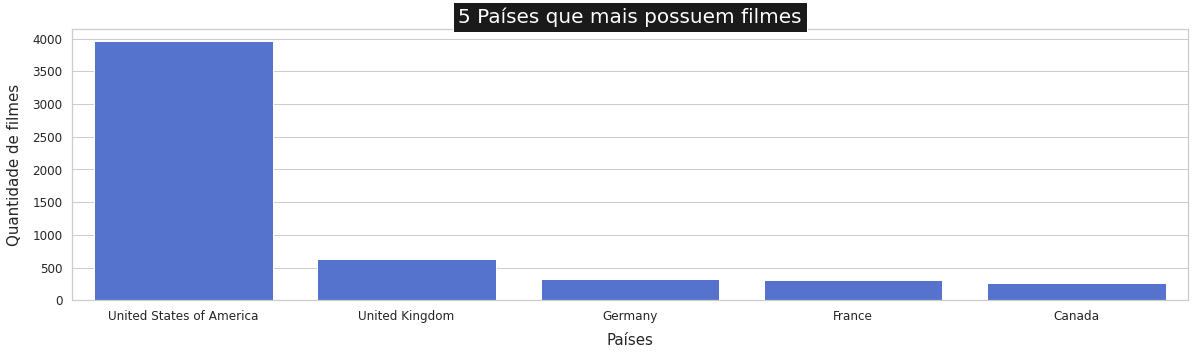

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='pais', y="frequencia", data=top_5_paises_com_mais_filme, color="#4169E1")

plt.title("5 Países que mais possuem filmes",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 20)
plt.xlabel("Países", fontsize = 15, labelpad = 10)
plt.xticks(fontsize = 12)
plt.ylabel("Quantidade de filmes", fontsize = 15, labelpad = 10)
plt.yticks(fontsize = 12)

####<font color=4169E1>1.2.2.2.Gráfico de barra mostrando a diferença na quantidade de filmes entre os Estados Unidos e o resto do mundo 

In [ ]:
filmes_usa = filmes_por_pais.iloc[0].frequencia
filmes_outros_paises = filmes_por_pais[1:].frequencia.sum()
dados = {
    'paises':['Estados Unidos', 'Outros países'],
    'frequencia': [filmes_usa, filmes_outros_paises]
}
dados = pd.DataFrame(dados)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

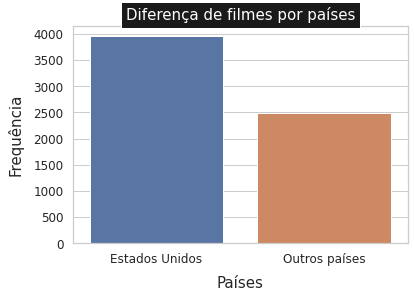

In [ ]:
sns.barplot(x="paises", y="frequencia", data=dados)
plt.title("Diferença de filmes por países",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Países", fontsize = 15, labelpad = 10)
plt.xticks(fontsize = 12)
plt.ylabel("Frequência", fontsize = 15, labelpad = 10)
plt.yticks(fontsize = 12)

####<font color=4169E1>1.2.2.3.Gráfico de pizza mostrando a % na quantidade de filmes entre os Estados Unidos e o resto do mundo 

Text(0.5, 1.0, '% de filmes por países')

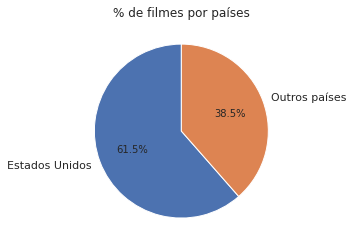

In [ ]:
plt.pie(dados.frequencia, labels=dados.paises, autopct='%1.1f%%', startangle=90)
plt.title("% de filmes por países")

####<font color=4169E1>1.2.2.4.Gráfico de Barra mostrando a quantidade de filmes onde o idioma original é inglês relacionado aos de outros idiomas

In [ ]:
contagem_de_lingua = filmes["idioma_original"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["idioma_original", "total"]
contagem_de_lingua.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
idioma_original,en,fr,es,de,zh,hi,ja,it,cn,ko,ru,pt,da,sv,nl,fa,he,th,id,cs,ta,ro,ar,ps,ky,pl,el,xx,te,vi,nb,no,tr,hu,is,af,sl
total,4505,70,32,27,27,19,16,14,12,11,11,9,7,5,4,4,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

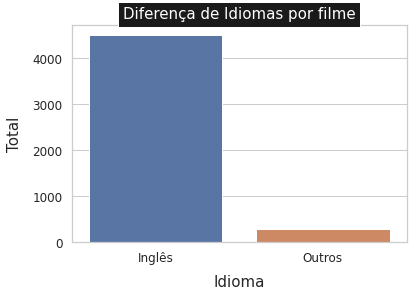

In [ ]:
total_por_lingua = filmes["idioma_original"].value_counts()
total_geral = total_por_lingua.sum()
total_em_ingles = total_por_lingua.loc["en"]
total_sem_ingles = total_geral - total_em_ingles
dados = {
    "Idioma": ["Inglês", "Outros"],
    "Total": [total_em_ingles, total_sem_ingles]
}
dados = pd.DataFrame(dados)
sns.barplot(x="Idioma", y="Total", data=dados)



plt.title("Diferença de Idiomas por filme",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 15)
plt.xlabel("Idioma", fontsize = 15, labelpad = 10)
plt.xticks(fontsize = 12)
plt.ylabel("Total", fontsize = 15, labelpad = 10)
plt.yticks(fontsize = 12)

###<font color=4169E1>1.2.3.Trabalhando sobre as datas de lançamento dos filmes

In [ ]:
#tirando filmes que não possuem data
filmes = filmes[-filmes.data_lancamento.isna()]

In [ ]:
filmes['ano'] = pd.to_datetime(filmes['data_lancamento']).apply(lambda x: int(str(x).split('-')[0]) if x != np.nan else np.nan)
decadas = filmes['ano'].apply(lambda x:((x-1900)//10)*10)

In [ ]:
filmes.head()

,orcamento,generos,homepage,filmeId,palavras_chave,idioma_original,titulo_original,visao_geral,popularidade,companhias_producao,paises_producao,data_lancamento,receita,tempo_de_filme,lingua_falada,status,slogan,titulo,media_notas,total_notas,elenco,diretor,ano
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,2009
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,2007
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,2015
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,2012
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,2012


In [ ]:
filmes_por_decada = decadas.value_counts().to_frame().reset_index()
filmes_por_decada.columns = ['decada', 'frequencia']
filmes_por_decada_ate_90 = filmes_por_decada[:3]
filmes_antes_90 = filmes_por_decada[4:].sum().to_frame().transpose()
filmes_por_decada_formatado = pd.concat([filmes_por_decada_ate_90,filmes_antes_90], axis=0)

dados = {
    100: "2000's",
    110: "2010's*",
    90: "90's",
    280: "10's até 80's"
}
filmes_por_decada_formatado['decada'] = filmes_por_decada_formatado['decada'].map(dados)
filmes_por_decada_formatado


,decada,frequencia
0,2000's,2048
1,2010's*,1446
2,90's,778
0,10's até 80's,252


####<font color=4169E1>1.2.3.1.Gráfico de pizza mostrando a % de filmes por decada

Text(0.5, 0, '*Dados de 2016')

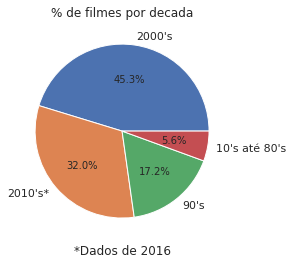

In [ ]:
plt.pie(filmes_por_decada_formatado.frequencia, labels=filmes_por_decada_formatado.decada, autopct='%1.1f%%')
plt.title("% de filmes por decada")
plt.xlabel("*Dados de 2016")

###<font color=4169E1>1.2.4.Trabalhando sobre a correlação dos dados

####<font color=4169E1>1.2.4.1. Correlação dos dados de receita por média de nota

A correlação indica a interdependência entre duas ou mais variáveis.
O coeficiente de correlação varia entre 1 e -1.
-> 0 indica sem relacionamento.
-> > 0 indica (positiva) indica uma relação positiva: quando uma das variáveis aumenta, a outra tende a aumentar.
-> < 0 indica (negativa) indica uma relação negativa: quando umas das variáveis aumenta, a outra tende a diminuir.

In [ ]:
filmesNovo = filmes[(filmes['receita'] > 0) & (filmes['total_notas'] >= 50)]

In [ ]:
#Correlação entre a receita e a média de notas -> método Pearson
filmesNovo['receita'].corr(filmesNovo['media_notas'])

0.16754014506261286

In [ ]:
#Correlação entre a receita e a média de notas -> método Spearman
filmesNovo['receita'].corr(filmesNovo['media_notas'], method='spearman')

0.0770133168485061

####<font color=4169E1>1.2.4.5.Gráfico de dispersão de nota receita por nota

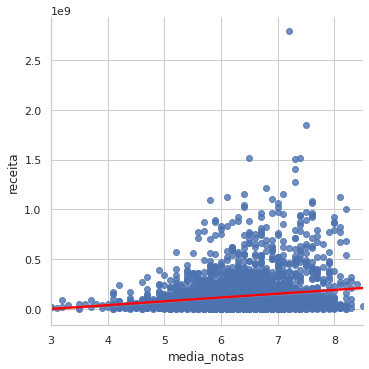

In [ ]:
sns.lmplot(x='media_notas', y='receita', data=filmesNovo, line_kws={'color':'red'})

####<font color=4169E1>1.2.4.3. Correlação dos dados de receita por orçamento

In [ ]:
#Filtrando os filmes com orçamento e receita maior que 0
#Criando um sub dataframe para trabalhar com os dados econômicos dos filmes
filtro_financeiro = (filmes['orcamento'] > 100) & (filmes['receita'] > 100)
filmes_financeiro = filmes[filtro_financeiro]
filmes_financeiro = filmes_financeiro.sort_values(by=['ano'])

In [ ]:
#Agrupando os dados ao longo das décadas

filtro_50 = filmes_financeiro['ano'] < 1950
filtro_70 = (filmes_financeiro['ano'] > 1950) & (filmes_financeiro['ano'] < 1970)
filtro_90 = (filmes_financeiro['ano'] > 1970) & (filmes_financeiro['ano'] < 1990)
filtro_2010 = (filmes_financeiro['ano'] > 1990) & (filmes_financeiro['ano'] < 2020)

orcamento_50 = filmes_financeiro.orcamento[filtro_50].mean()
receita_50 = filmes_financeiro.receita[filtro_50].mean()

orcamento_70 = filmes_financeiro.orcamento[filtro_70].mean()
receita_70 = filmes_financeiro.receita[filtro_70].mean()

orcamento_90 = filmes_financeiro.orcamento[filtro_90].mean()
receita_90 = filmes_financeiro.receita[filtro_90].mean()

orcamento_2010 = filmes_financeiro.orcamento[filtro_2010].mean()
receita_2010 = filmes_financeiro.receita[filtro_2010].mean()

####<font color=4169E1>1.2.4.4. Gráfico mostrando a correlação de orçamento e receita

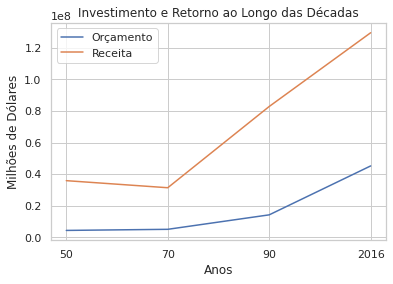

In [ ]:
#Gráfico mostra o crescimento dos investimentos e dos lucros dos filmes ao longo das décadas

plt.title('Investimento e Retorno ao Longo das Décadas')
orcamento, = plt.plot(['50', '70', '90', '2016'], [orcamento_50, orcamento_70, orcamento_90, orcamento_2010])
receita, = plt.plot(['50', '70', '90', '2016'], [receita_50, receita_70, receita_90, receita_2010])
plt.xlabel('Anos')
plt.ylabel('Milhões de Dólares')
plt.legend([orcamento, receita], ['Orçamento', 'Receita'])
plt.show()

####<font color=4169E1>1.2.4.5. Gráfico ROI(Retorno sobre Investimento)

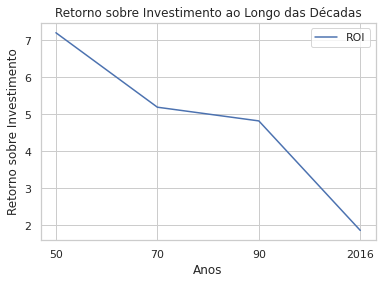

In [ ]:
#Gráfico mostra o ROI (Retorno sobre Investimento) ao Longo dos Anos
#ROI = (Ganho obtido – Investimento) / Investimento

plt.title('Retorno sobre Investimento ao Longo das Décadas')
roi, = plt.plot(['50', '70', '90', '2016'], 
               [(receita_50 - orcamento_50)/orcamento_50,
                (receita_70 - orcamento_70)/orcamento_70,
                (receita_90 - orcamento_90)/orcamento_90,
                (receita_2010 - orcamento_2010)/orcamento_2010])
plt.xlabel('Anos')
plt.ylabel('Retorno sobre Investimento')
plt.legend([roi] , ['ROI'])
plt.show()

###<font color=4169E1>1.2.5.Trabalhando sobre os dados de Popularidade

####<font color=4169E1>1.2.5.1.Gráfico de Barra mostrando as palavras chaves mais utilizadas de filmes

In [ ]:
palavras_chave = filmes.apply(lambda x: pd.Series(x['palavras_chave']),axis=1).stack().reset_index(level=1, drop=True).value_counts().to_frame().reset_index()
palavras_chave.columns = ['palavra_chave', 'frequencia']
palavras_chave = palavras_chave[:25]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

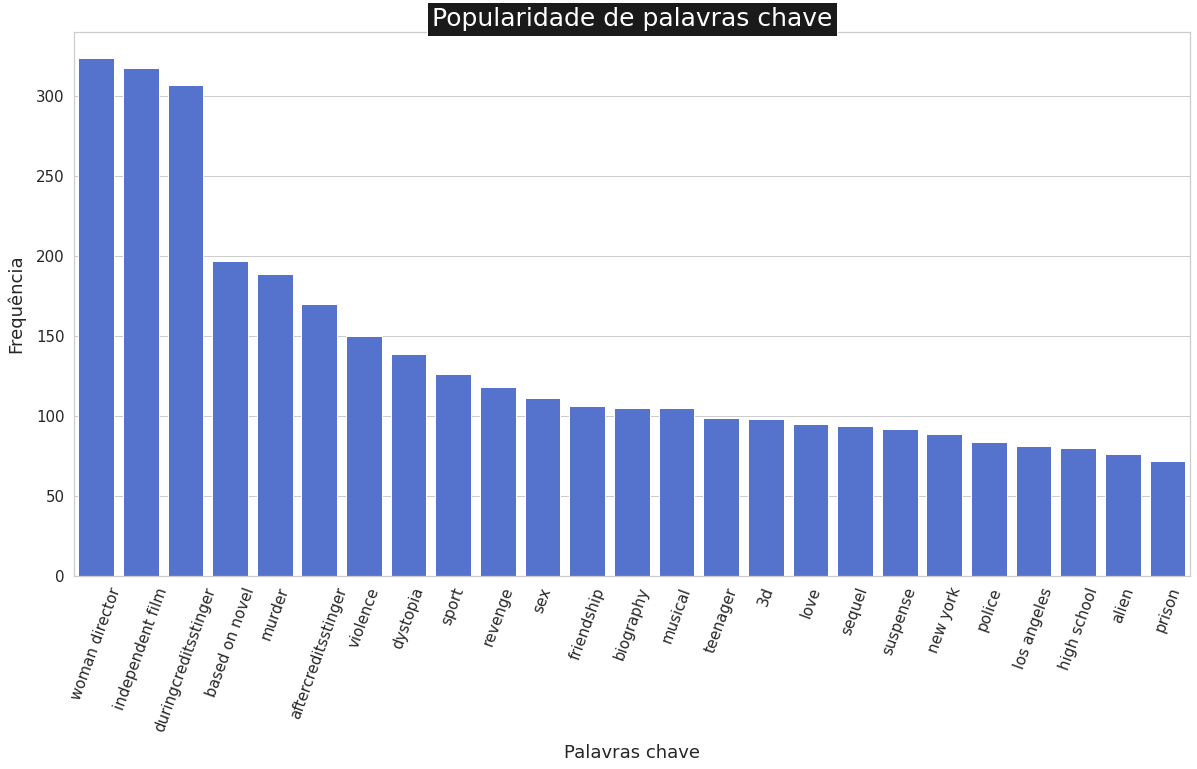

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=palavras_chave.palavra_chave, y=palavras_chave.frequencia, data=palavras_chave, color='#4169E1', )
plt.title("Popularidade de palavras chave",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.xlabel("Palavras chave", fontsize = 18, labelpad = 10)
plt.xticks(rotation=70, fontsize = 15)
plt.ylabel("Frequência", fontsize = 18, labelpad = 10)
plt.yticks(fontsize = 15)

####<font color=4169E1>1.2.5.2.Gráfico mostrando os filmes mais populares

In [ ]:
popularidade = filmes.sort_values('popularidade', ascending=False)[:5]
top_5_filmes_populares = popularidade[['titulo','popularidade']]

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

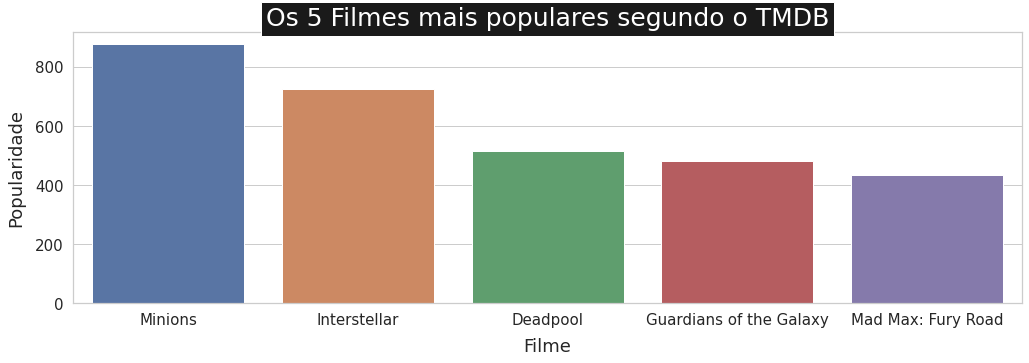

In [ ]:
plt.figure(figsize=(17, 5))
plt.title("Os 5 Filmes mais populares segundo o TMDB",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
sns.barplot(x=top_5_filmes_populares.titulo, y=top_5_filmes_populares.popularidade, data=top_5_filmes_populares)
plt.xlabel("Filme", fontsize = 18, labelpad = 10)
plt.xticks(fontsize = 15)
plt.ylabel("Popularidade", fontsize = 18, labelpad = 10)
plt.yticks(fontsize = 15)

####<font color=4169E1>1.2.5.3.Gráfico mostrando os diretores com filmes mais populares

In [ ]:
diretores_populares = filmes.groupby('diretor')['popularidade'].mean().to_frame()
filmes_por_diretor = filmes.diretor.value_counts().to_frame()
diretores_populares_por_filme = pd.concat([diretores_populares, filmes_por_diretor], axis=1)
top_5_diretores_populares = diretores_populares_por_filme.sort_values('popularidade', ascending=False).reset_index()[:5]
top_5_diretores_populares.columns = ['diretor', 'popularidade', 'quantidade_filmes']
top_5_diretores_populares = (top_5_diretores_populares.replace(r'^\s*$', np.nan, regex=True).dropna())
top_5_diretores_populares

,diretor,popularidade,quantidade_filmes
0,Kyle Balda,875.581305,1
1,Tim Miller,514.569956,1
2,Colin Trevorrow,221.947277,2
3,Damien Chazelle,192.528841,1
4,Christopher Nolan,185.373245,8


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text major ticklabel objects>)

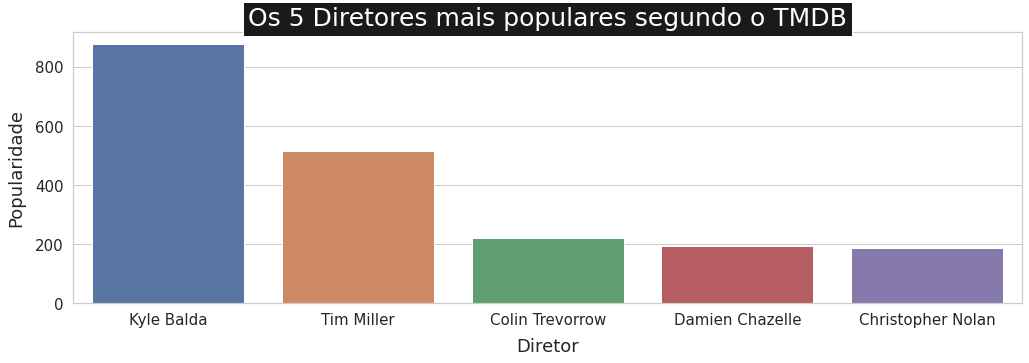

In [ ]:
plt.figure(figsize=(17, 5))
plt.title("Os 5 Diretores mais populares segundo o TMDB",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
sns.barplot(x=top_5_diretores_populares.diretor, y=top_5_diretores_populares.popularidade, data=top_5_diretores_populares)
plt.xlabel("Diretor", fontsize = 18, labelpad = 10)
plt.xticks(fontsize = 15)
plt.ylabel("Popularidade", fontsize = 18, labelpad = 10)
plt.yticks(fontsize = 15)

####<font color=4169E1>1.2.5.4.Gráfico mostrando os Atores com mais aparições

In [ ]:
elenco = filmes.apply(lambda x: pd.Series(x['elenco']),axis=1).stack().reset_index(level=1, drop=True)
frequencia_elenco = elenco.value_counts().to_frame().reset_index()
frequencia_elenco.columns = ['elenco','frequencia']
top_10_frequencias = frequencia_elenco[:51]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

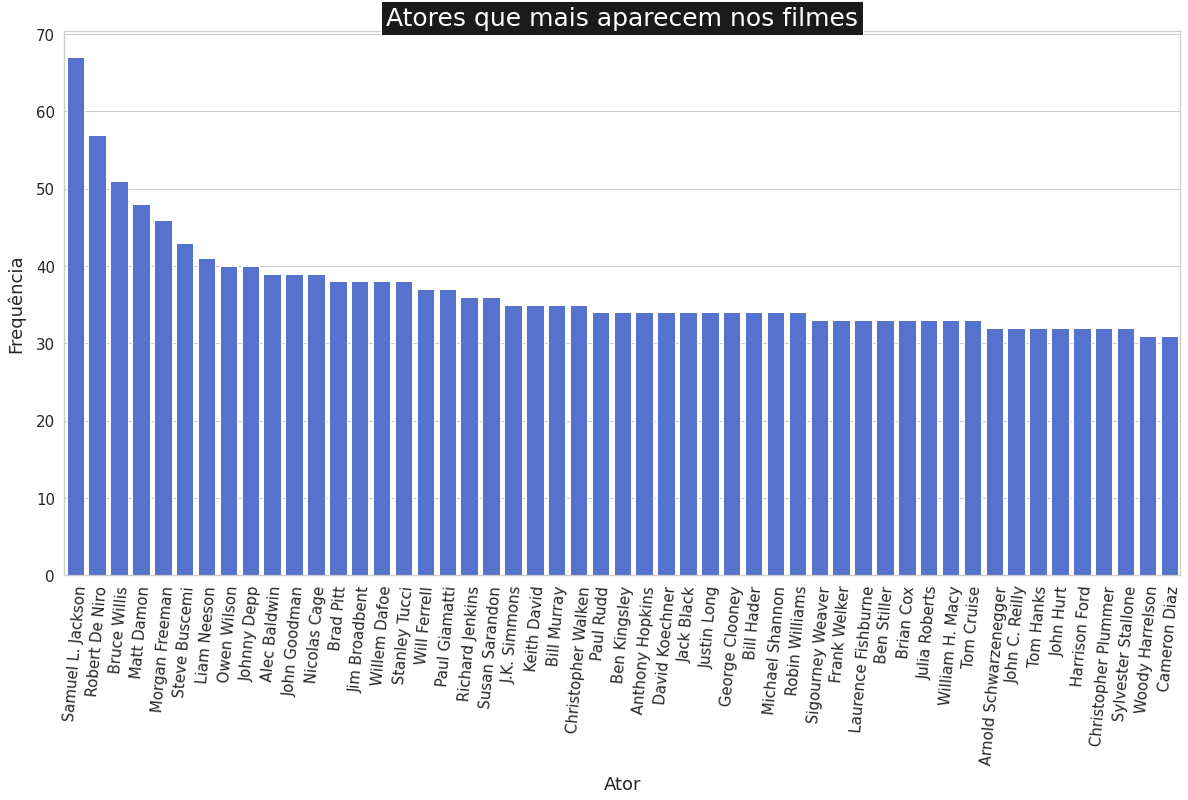

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=top_10_frequencias.elenco, y=top_10_frequencias.frequencia, data=top_10_frequencias, color='#4169E1')
plt.title("Atores que mais aparecem nos filmes",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.xlabel("Ator", fontsize = 18, labelpad = 10)
plt.xticks(rotation=85, fontsize = 15)
plt.ylabel("Frequência", fontsize = 18, labelpad = 10)
plt.yticks(fontsize = 15)

####<font color=4169E1>1.2.5.5.Gráficos mostrando os atores que mais aparecem por gênero

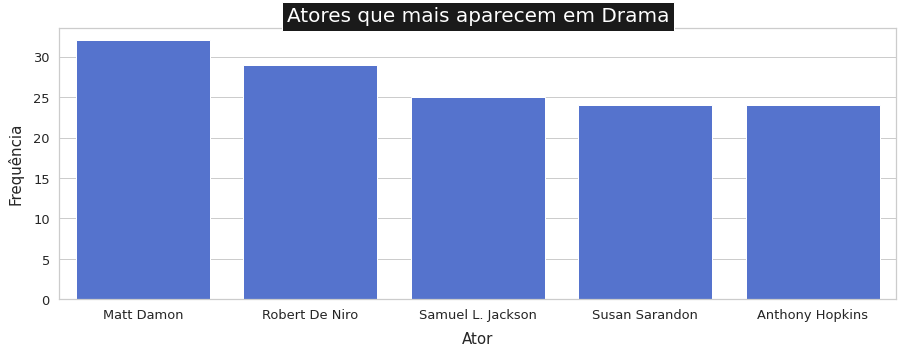

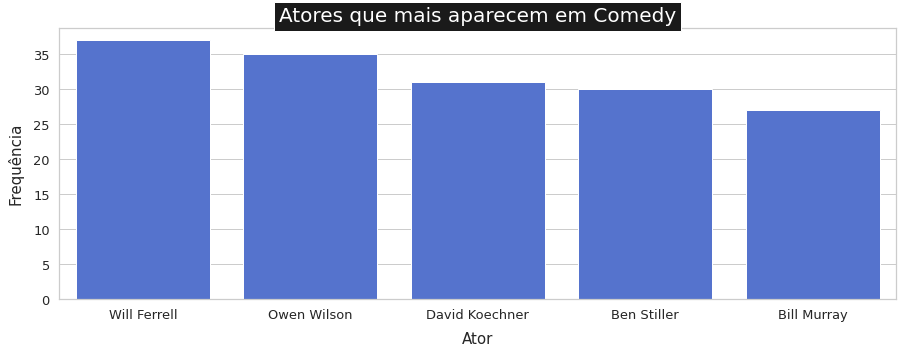

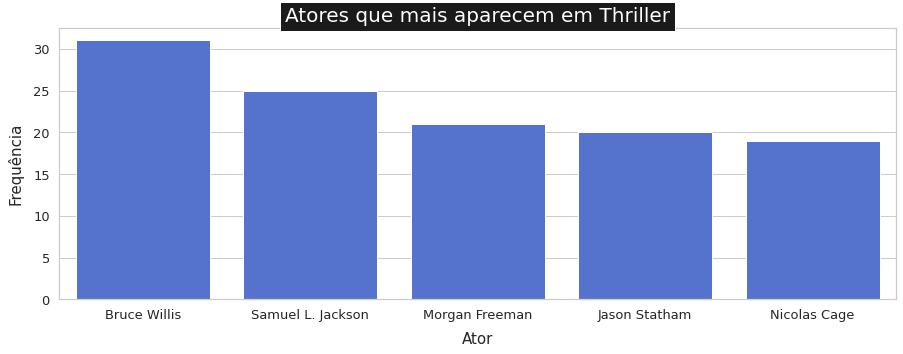

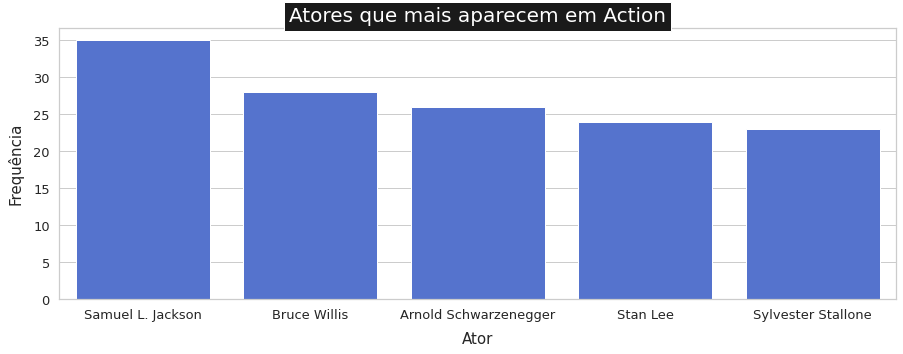

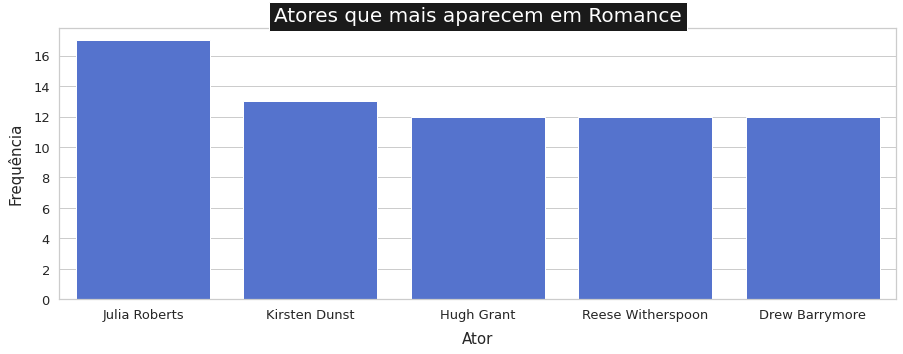

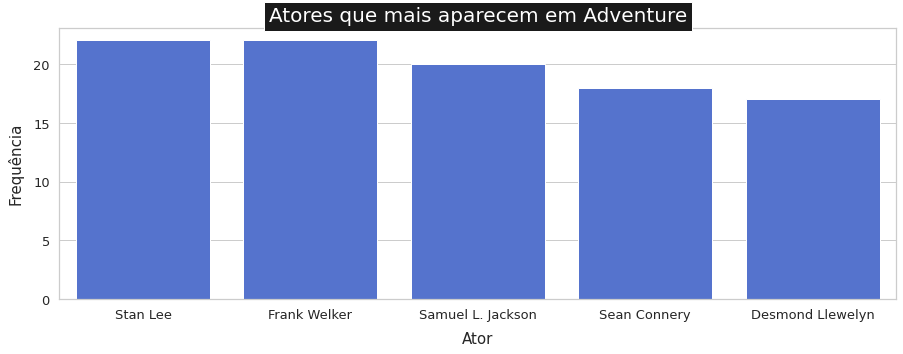

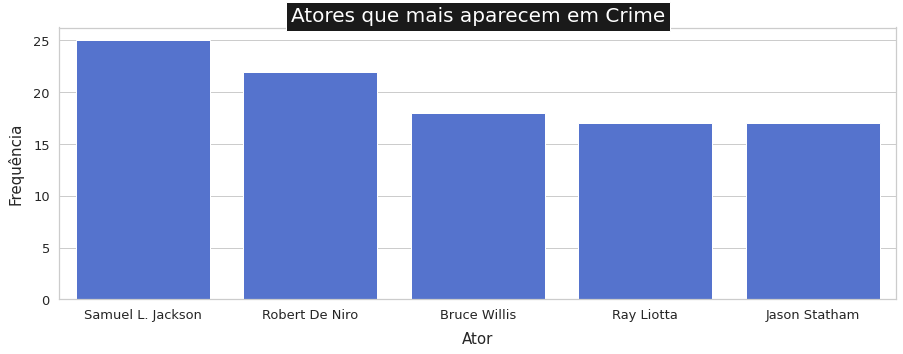

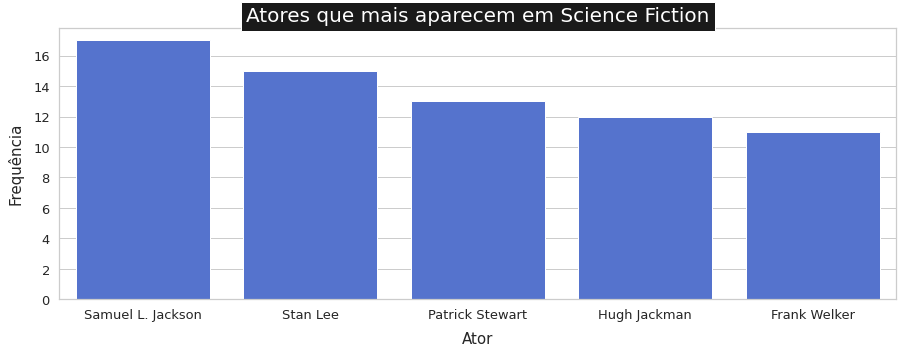

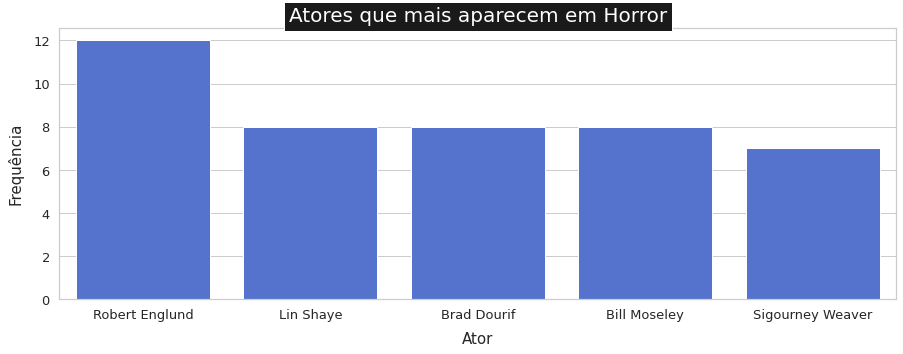

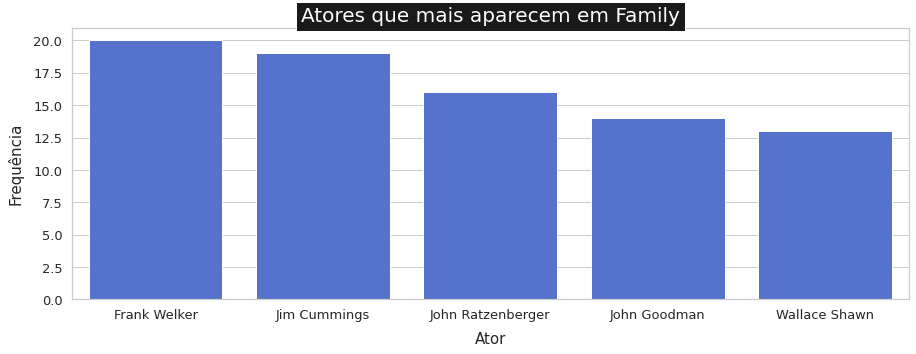

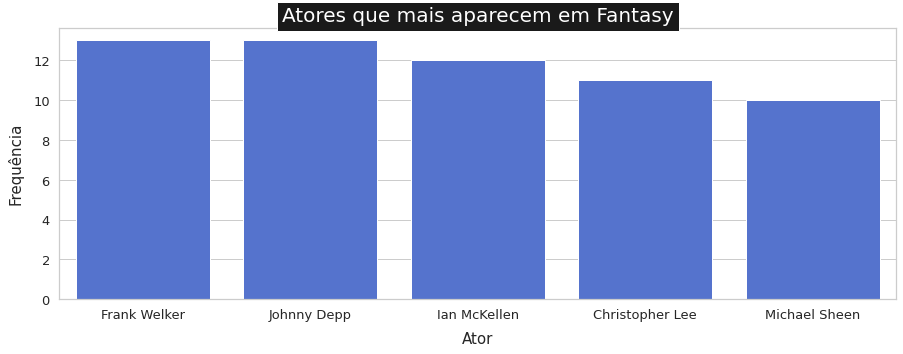

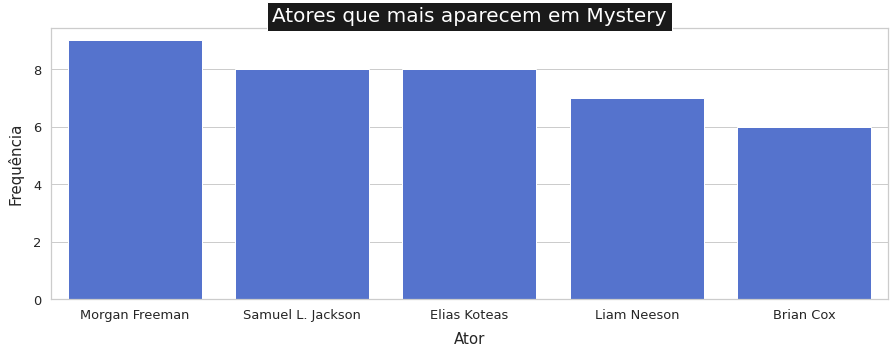

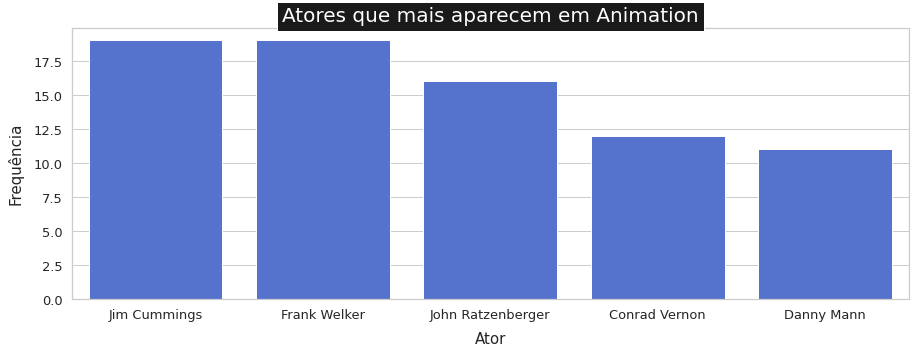

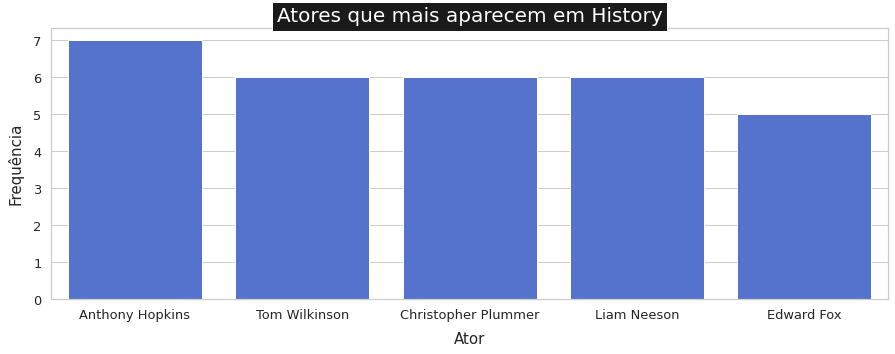

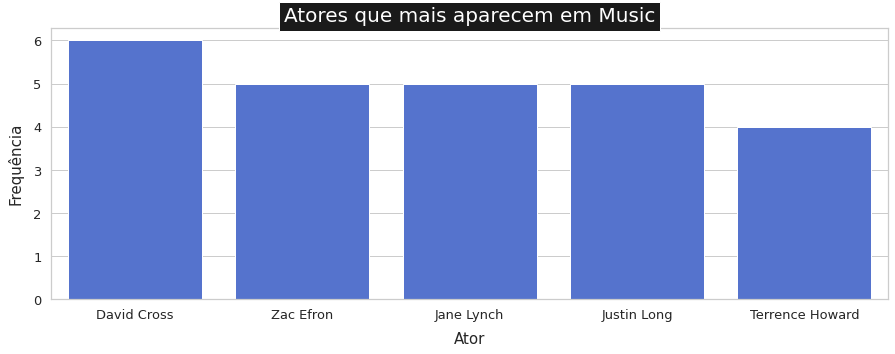

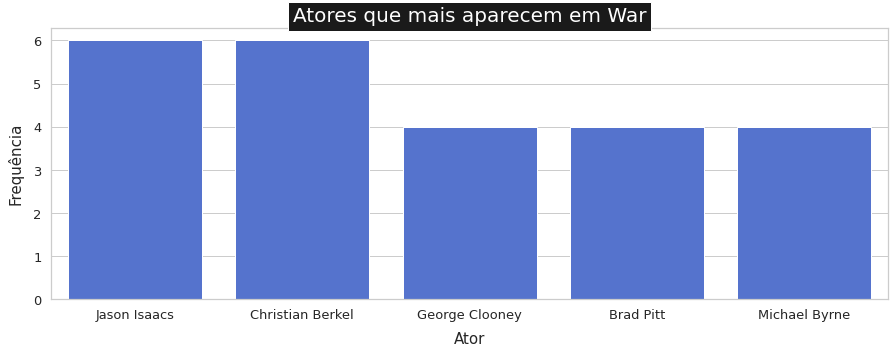

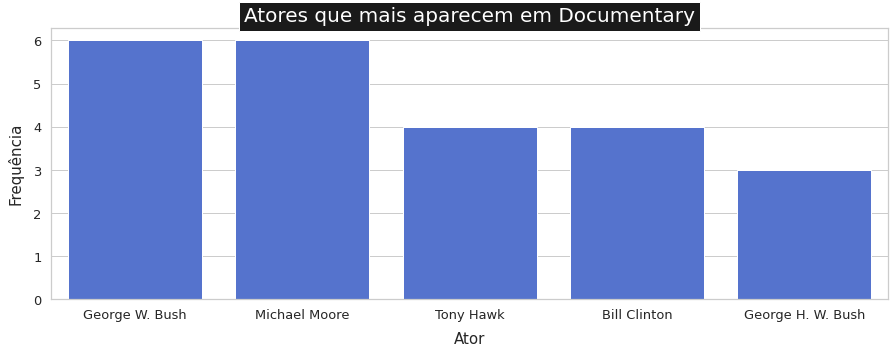

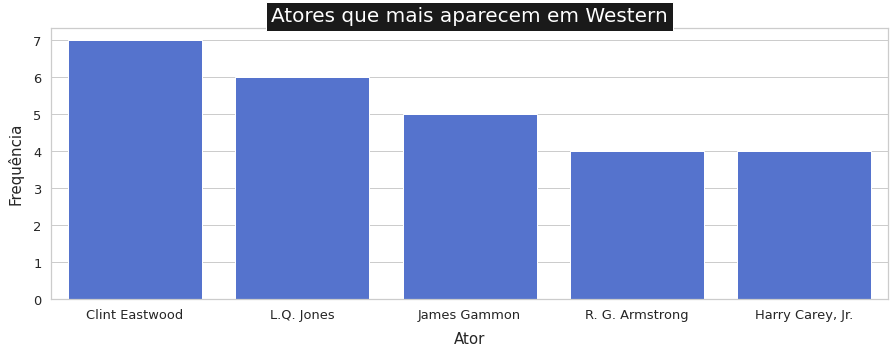

In [ ]:
def pegaFilmesPorGenero(df, genero):
  filmes = []
  for i in df.generos:
    if genero in i:
      filmes.append(True)
    else:
      filmes.append(False)
  return df[filmes]

def pegaAtorPorGenero(df):
  atores = df.apply(lambda x: pd.Series(x['elenco'], dtype=str),axis=1).stack().reset_index(level=1, drop=True)
  frequencia_atores = atores.value_counts().to_frame().reset_index()
  frequencia_atores.columns = ['ator','frequencia']
  return frequencia_atores[:5]

def plotaGrafico(atores, genero):
  plt.figure(figsize=(15,5))
  sns.barplot(x=atores.ator, y=atores.frequencia, data=atores, color='#4169E1', )
  plt.title(f"Atores que mais aparecem em {genero}",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 20)
  plt.xlabel("Ator", fontsize = 15, labelpad = 10)
  plt.xticks(fontsize = 13)
  plt.ylabel("Frequência", fontsize = 15, labelpad = 10)
  plt.yticks(fontsize = 13)

generos = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Science Fiction', 'Horror', 'Family', 'Fantasy',
       'Mystery', 'Animation', 'History', 'Music', 'War', 'Documentary',
       'Western']
for genero in generos:
  filme_por_genero = pegaFilmesPorGenero(filmes, genero)
  top_5_atores_por_genero = pegaAtorPorGenero(filme_por_genero)
  plotaGrafico(top_5_atores_por_genero, genero)


####<font color=4169E1>1.2.5.6.Gráfico mostrando os gêneros que mais tem filme

In [ ]:
generos = filmes.apply(lambda x: pd.Series(x['generos']),axis=1).stack().reset_index(level=1, drop=True)
frequencia_generos = generos.value_counts().to_frame().reset_index()
frequencia_generos.columns = ['genero','frequencia']
frequencia_generos.transpose()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
genero,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,History,Music,War,Documentary,Western,Foreign,TV Movie
frequencia,2297,1722,1274,1154,894,790,696,535,519,513,424,348,234,197,185,144,110,82,34,8


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

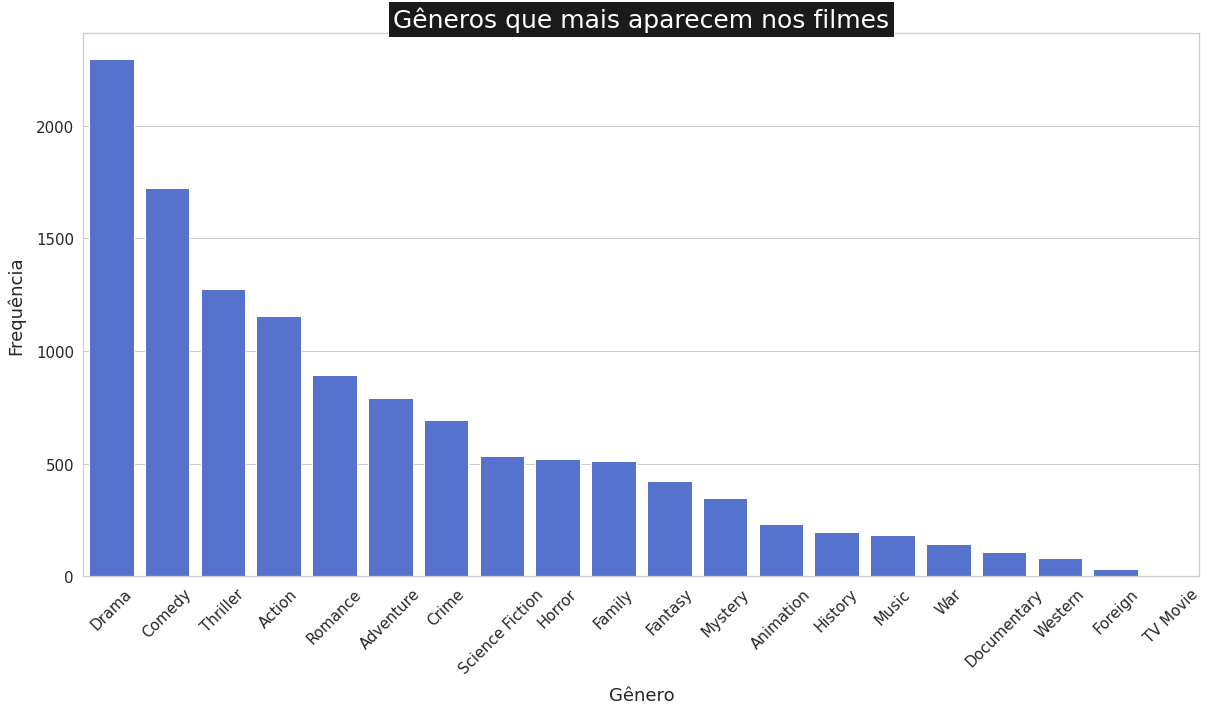

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=frequencia_generos.genero, y=frequencia_generos.frequencia, data=frequencia_generos, color='#4169E1')
plt.title("Gêneros que mais aparecem nos filmes",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.xlabel("Gênero", fontsize = 18, labelpad = 10)
plt.xticks(rotation=45, fontsize = 15)
plt.ylabel("Frequência", fontsize = 18, labelpad = 10)
plt.yticks(fontsize = 15)

#<font color=4169E1>2.Introdução ao Machine Learning